# Audio Manipulation


In [10]:
#Import cell
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy import ndimage
from skimage import color

# Assignment 1 - Generating Simple Periodic Signals

In [11]:
# 1. Write a function for generating a real-valued periodic time signal given the 
# Fourier series coefficients [a0 a1 ···aN], the sampling frequency, and the fundamental 
# frequency. You may choose to have complex input coefficients or have separate magnitude
# and phase vectors for describing ak.

def generate(mags, phases, w, time):
    x = np.zeros((len(mags), len(time)))
    x[0, :] = mags[0]
    w = w * 2 * np.pi
    for i in range (1, len(mags)):
        x[i, :] = 2 * mags[i] * np.cos(i * w * time + phases[i])
        
    signal = np.zeros(len(time))
    for o in range (len(mags)):
        signal = signal + (x[o, :])
    
    return signal    

In [12]:
# 2. Define variables for the sampling frequency (8kHz) and the fundamental frequency (20Hz). Using this
# sampling frequency, create a time vector for a length of 200ms.

fs1 = 8000
w1 = 20
time1 = np.arange(0, .2 + 1/fs1, 1/fs1)

<IPython.core.display.Javascript object>


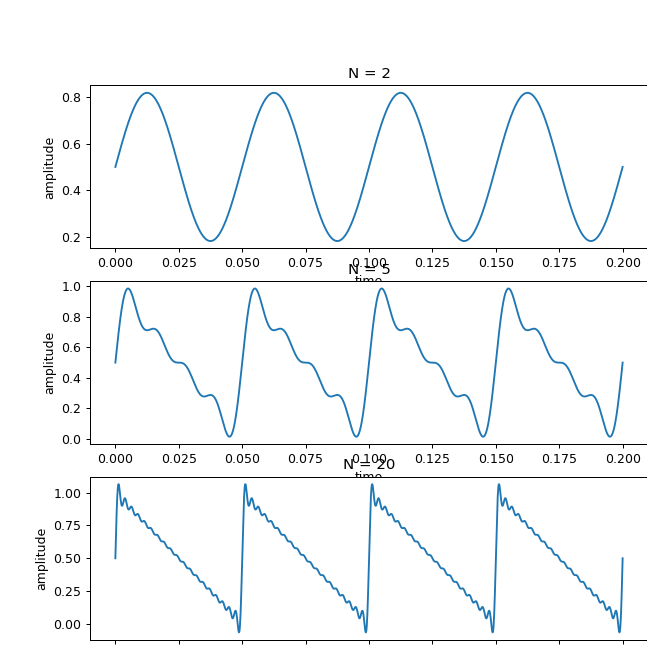

Text(0, 0.5, 'amplitude')

In [13]:
# 3. The sawtooth signal has coefficients
# a0 = 0.5,ak = 1/(j2kπ)
# Using the function from part (a), create three approximations of this signal with N = 2,5,20 and plot
# together in a 3×1 comparison.

def coeffsSawtooth(n):
    cMag = np.zeros(n)
    cPhase = np.zeros(n)
    cMag[0] = 0.5
    cPhase[0] = 0
    
    for i in range (1, n):
        cMag[i] = np.abs(complex(0, -1 / (2 * np.pi * i)))
        cPhase[i] = np.angle(complex(0, -1 / (2 * np.pi * i)))
        
    return cMag, cPhase

cMag1, cPhase1 = coeffsSawtooth(2)
cMag2, cPhase2 = coeffsSawtooth(5)
cMag3, cPhase3 = coeffsSawtooth(20)

x1 = generate(cMag1, cPhase1, w1, time1)
x2 = generate(cMag2, cPhase2, w1, time1)
x3 = generate(cMag3, cPhase3, w1, time1)

fig = plt.figure(1, figsize = (8, 8))

plt.subplot(311)
plt.plot(time1, x1)
plt.title('N = 2')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(312)
plt.plot(time1, x2)
plt.title('N = 5')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(313)
plt.plot(time1, x3)
plt.title('N = 20')
plt.xlabel('time')
plt.ylabel('amplitude')

In [14]:
# 4. A triangle signal has coefficients
# a0 = 0.5,ak = 2 sin(kπ/2)
# j(kπ)2 e−j2kπ/2
# Create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.

def coeffsTriangle(n):
    cTriMag = np.zeros(n)
    cTriPhase = np.zeros(n)
    cTriMag[0] = 0.5
    cTriPhase[0] = 0
    
    for i in range (1, n):
        cTriMag[i] = np.abs(complex(0, ((-2*np.sin(i*np.pi/2))/((i*np.pi)**2))*np.exp(complex(0, -2*i*np.pi/2))))
        cTriPhase[i] = np.angle(complex(0, ((-2*np.sin(i*np.pi/2))/((i*np.pi)**2))*np.exp(complex(0, -2*i*np.pi/2))))
        
    return cTriMag, cTriPhase

<IPython.core.display.Javascript object>


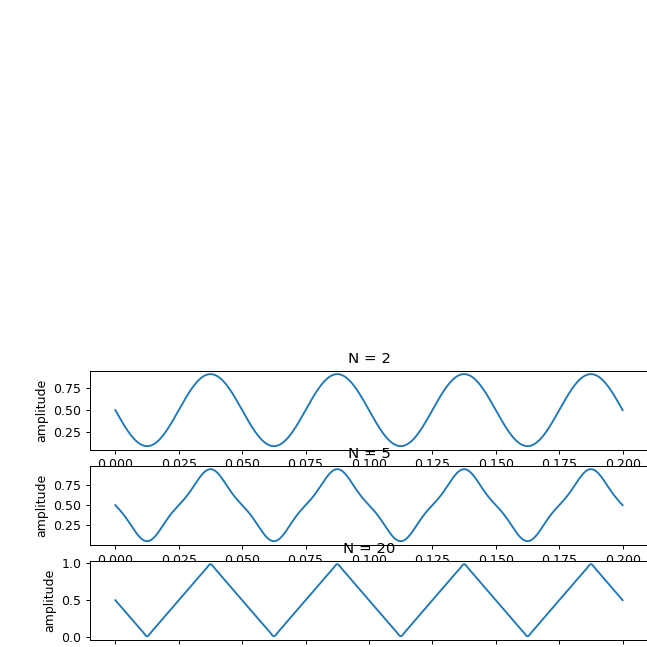

Text(0, 0.5, 'amplitude')

In [15]:
cTriMag1, cTriPhase1 = coeffsTriangle(2)
cTriMag2, cTriPhase2 = coeffsTriangle(5)
cTriMag3, cTriPhase3 = coeffsTriangle(20)

x1 = generate(cTriMag1, cTriPhase1, w1, time1)
x2 = generate(cTriMag2, cTriPhase2, w1, time1)
x3 = generate(cTriMag3, cTriPhase3, w1, time1)

fig = plt.figure(2, figsize = (8, 8))

plt.subplot(614)
plt.plot(time1, x1)
plt.title('N = 2')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(615)
plt.plot(time1, x2)
plt.title('N = 5')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(616)
plt.plot(time1, x3)
plt.title('N = 20')
plt.xlabel('time')
plt.ylabel('amplitude')

### Assignment 1 Discussion

The second signal converges more quickly because sinusoidal waves are more similar to triangle waves than they are to sawtooth waves, so the sinusoidal approximations are more similar to the second signal by nature. Also, the triangle signal has fewer discontinuities than the sawtooth, which helps the approximation converge quicker.

# Assignment 2

In [16]:
#Part 1
#We extract the data from the given horn file and create the time vector
fs, sound = wav.read('horn11short.wav')
time = np.arange(0, len(sound), 1) * 1.0 / fs
w = 335
#We create the simple sine and multiply it by 1100 so we can actually hear it and then save it to a file
simple_sine = np.sin(2*np.pi*w*time)*1100

wav.write('simple_sine.wav', fs, simple_sine.astype('int16'))


In [17]:
#Part 2
#We make the two coefficient (phase and magnitude) arrays and pass them into the function we defined
#We then save the result to a file
cMag1 = np.array([0, 2688, 1900, 316, 178, 78, 38])
cPhase1 = np.array([0, -1.73, -1.45, 2.36, 2.30, -2.30, 1.13])

x1 = generate(cMag1, cPhase1, w, time)
wav.write('part2_1.wav', fs, x1.astype('int16'))

<IPython.core.display.Javascript object>


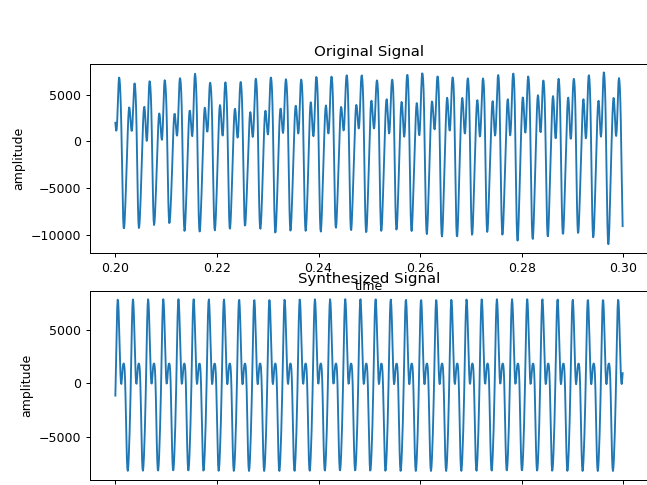

Text(0, 0.5, 'amplitude')

In [18]:
#Part 3
#To plot we find extract the portions from the time, sound, and x1 signals corresponding to the time 
#between 200 ms and 300 ms and then we plot

start_index = int(fs*0.2) 
stop_index = int(fs*0.3)
time_plot = time[start_index:stop_index]
sound_plot = sound[start_index:stop_index]
x1_plot = x1[start_index:stop_index]

fig = plt.figure(3, figsize = (8, 6))

plt.subplot(211)
plt.plot(time_plot, sound_plot)
plt.title('Original Signal')
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(time_plot, x1_plot)
plt.title('Synthesized Signal')
plt.xlabel('time')
plt.ylabel('amplitude')

In [19]:
#Part 4
#And then we create wave objects and play them
orig = sa.WaveObject.from_wave_file('horn11short.wav')
play_orig = orig.play()
play_orig.wait_done()

simple_sine = sa.WaveObject.from_wave_file('simple_sine.wav')
play_simple = simple_sine.play()
play_simple.wait_done()

synth = sa.WaveObject.from_wave_file('part2_1.wav')
play_synth = synth.play()
play_synth.wait_done()

Discussion: The main source of distortion is probably the fact that we have such a small number of coefficients (ak) for this signal which makes the synthesized signal pretty different from the original signal. 

# Assignment 3

<IPython.core.display.Javascript object>


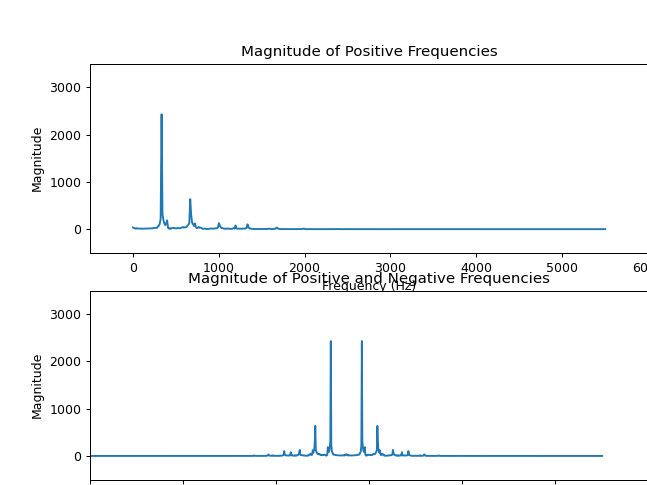

(-500.0, 3500.0)

In [20]:
#Part 1 We compute the FFT for the 100 ms horn signal
fs, sound = wav.read('horn11short.wav')
time = np.arange(0, 0.1, (1.0/fs))
stop = int((0.1*fs))
soundUse = sound[0:stop]
xhf = np.fft.fft(soundUse, 1024)  #len 1024
xhf2 = np.fft.fftshift(xhf)  #len 1024
#posFreq = xhf[0:int((len(xhf)/2))]  #len 512

#We dont have to scale the positive frequencies
xhf2Mag = (np.abs(xhf2)/1024)
xhfMag = (np.abs(xhf)/1024)
posFreqMag = xhfMag[0:512]

#freq1 = posFreq * (fs/1024)
#freq2 = xhf2 * (fs/1024)
firstStop = int((stop/2))  #The value is 551 
#I think stop = N, fs = firstStop or something. So second one has twice the samples. 

#interval = int((stop/512))
#intervalTwo = int(interval/2)

#freq1 = np.arange(0, firstStop, (firstStop/512))  #len is 512
#freq2 = np.arange((-1*firstStop), firstStop, intervalTwo)

#freq2 = np.arange((-1*firstStop), firstStop, ((2*firstStop)/1024))

#freq1 = np.arange(0, 512, 1) * (fs/512)
freq2 = np.arange(0, 1024, 1) * (fs/1024)
freq1 = freq2[0:512]

fig = plt.figure(4, figsize = (8, 6))

plt.subplot(211)
plt.plot(freq1, posFreqMag)
plt.title('Magnitude of Positive Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-500, 6000)
plt.ylim(-500, 3500)

plt.subplot(212)
plt.plot(freq2, xhf2Mag)
plt.title('Magnitude of Positive and Negative Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 12000)
plt.ylim(-500, 3500)

<IPython.core.display.Javascript object>


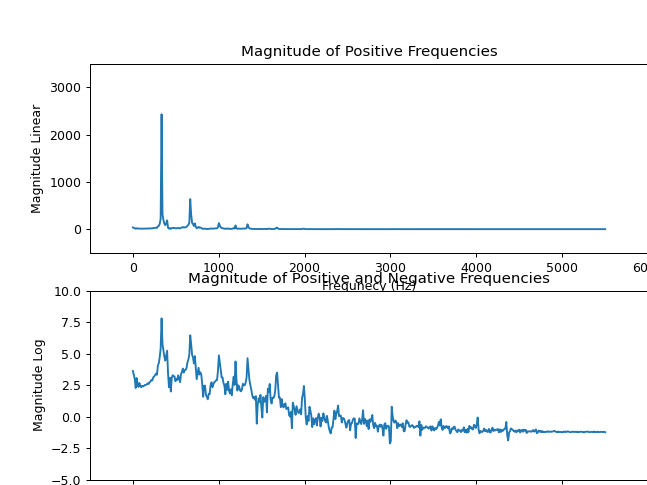

(-5.0, 10.0)

In [21]:
#Part 2 We plot the frequency on a log scale

fs, sound = wav.read('horn11short.wav')
time = np.arange(0, 0.1, (1.0/fs))
stop = int((0.1*fs))
soundUse = sound[0:stop]
xhf = np.fft.fft(soundUse, 1024)  #len 1024
xhf2 = np.fft.fftshift(xhf)  #len 1024
#posFreq = xhf[0:int((len(xhf)/2))]  #len 512

#We dont have to scale the positive frequencies
xhf2Mag = (np.abs(xhf2)/1024)
xhfMag = (np.abs(xhf)/1024)
posFreqMag = xhfMag[0:512]

#freq1 = posFreq * (fs/1024)
#freq2 = xhf2 * (fs/1024)

freq2 = np.arange(0, 1024, 1) * (fs/1024)
freq1 = freq2[0:512]





fig = plt.figure(5, figsize = (8, 6))

plt.subplot(211)
plt.plot(freq1, posFreqMag)
plt.title('Magnitude of Positive Frequencies')
plt.xlabel('Frequnecy (Hz)')
plt.ylabel('Magnitude Linear')
plt.xlim(-500, 6000)
plt.ylim(-500, 3500)


posFreqLog = np.log(posFreqMag)


plt.subplot(212)
plt.plot(freq1, posFreqLog)
plt.title('Magnitude of Positive and Negative Frequencies')
plt.xlabel('Frequnecy (Hz)')
plt.ylabel('Magnitude Log')
plt.xlim(-500, 6000)
plt.ylim(-5, 10)

<IPython.core.display.Javascript object>


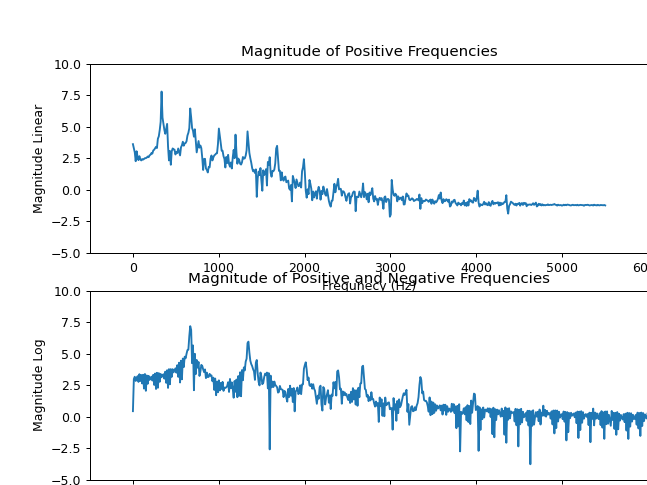

(-5.0, 10.0)

In [22]:
#Part 3 Changing the size of the FFT

fs, sound = wav.read('horn11short.wav')
time = np.arange(0, 0.1, (1.0/fs))
stop = int((0.1*fs))
soundUse = sound[0:stop]
xhf = np.fft.fft(soundUse, 2048)  #len 1024
xhf_orig = np.fft.fft(soundUse, 1024)

xhfMag = (np.abs(xhf)/2048)
posFreqMag = xhfMag[0:1024]
xhfMag_orig = (np.abs(xhf_orig)/1024)
posFreqMag_orig = xhfMag_orig[0:512]

#freq1 = posFreq * (fs/1024)
#freq2 = xhf2 * (fs/1024)

freq2 = np.arange(0, 2048, 1) * (fs/1024)
freq2_use = freq2[0:1024]
freq1 = np.arange(0, 1024, 1) * (fs/1024)
freq1_use = freq1[0:512]

origLog = np.log(posFreqMag_orig)
nextLog = np.log(posFreqMag)


fig = plt.figure(6, figsize = (8, 6))

plt.subplot(211)
plt.plot(freq1_use, origLog)
plt.title('Magnitude of Positive Frequencies')
plt.xlabel('Frequnecy (Hz)')
plt.ylabel('Magnitude Linear')
plt.xlim(-500, 6000)
plt.ylim(-5, 10)




plt.subplot(212)
plt.plot(freq2_use, nextLog)
plt.title('Magnitude of Positive and Negative Frequencies')
plt.xlabel('Frequnecy (Hz)')
plt.ylabel('Magnitude Log')
plt.xlim(-500, 6000)
plt.ylim(-5, 10)

Report Discussion: I beleive that the reason for the difference is that before we assumed the signal was periodic and were trying to approximate it to the best of our ability using periodic functions. However, the sound isn't truly periodic and so when we use the FFT, we try to approximate the true sound (which isn't peridoic) to the best of our ability, and that gives us differnt values for the magnitude because the true signal is more complicated than the periodic approximation we were using before.

# Assignment 4

<IPython.core.display.Javascript object>


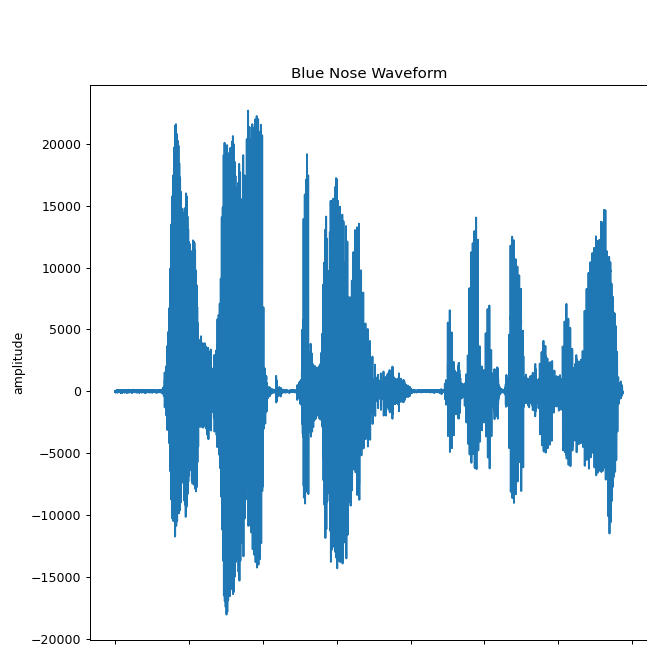

In [23]:
# 1. Download the signal “bluenose3.wav”, and read in the file. Plot the full waveform, using the sampling
# frequency to correctly label the time access. Play the file.

fs, sound = wav.read("bluenose3.wav")
time = np.arange(0, len(sound))/fs

fig = plt.figure(7, figsize = (8, 8))
plt.subplot(111)
plt.plot(time, sound)
plt.title('Blue Nose Waveform')
plt.xlabel('time sec')
plt.ylabel('amplitude')

sound_sa = sa.WaveObject.from_wave_file("bluenose3.wav")
play_sound = sound_sa.play()
play_sound.wait_done()

<IPython.core.display.Javascript object>


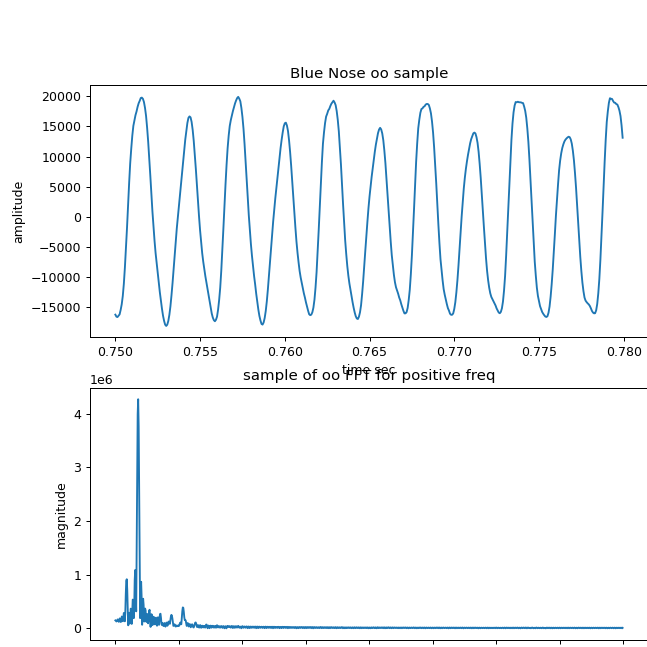

Text(0, 0.5, 'magnitude')

In [24]:
# 2. Extract the samples corresponding to times [0.75,0.78]. (This corresponds to the “oo” sound in the
# word “grew.”) Using a 2x1 plot, plot the time waveform (labeling the time axis with the specified time
# region) and the magnitude of the frequency response (positive frequencies only, labeling the frequency
# axis in Hz).

extract = sound[int(.75*fs):int(.78*fs)].copy()
t_extract = time[int(.75*fs):int(.78*fs)].copy()

nfft = 2048
xhf = np.fft.fft(extract, nfft)
freq = np.arange(0, fs, fs / nfft)

fig = plt.subplots(2, 1, figsize=(8, 8))

plt.subplot(211)
plt.plot(t_extract, extract)
plt.title('Blue Nose oo sample')
plt.xlabel('time sec')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(freq[0:nfft//2], np.abs(xhf[0:nfft//2]))
plt.title('sample of oo FFT for positive freq')
plt.xlabel('frequency Hz')
plt.ylabel('magnitude')

<IPython.core.display.Javascript object>


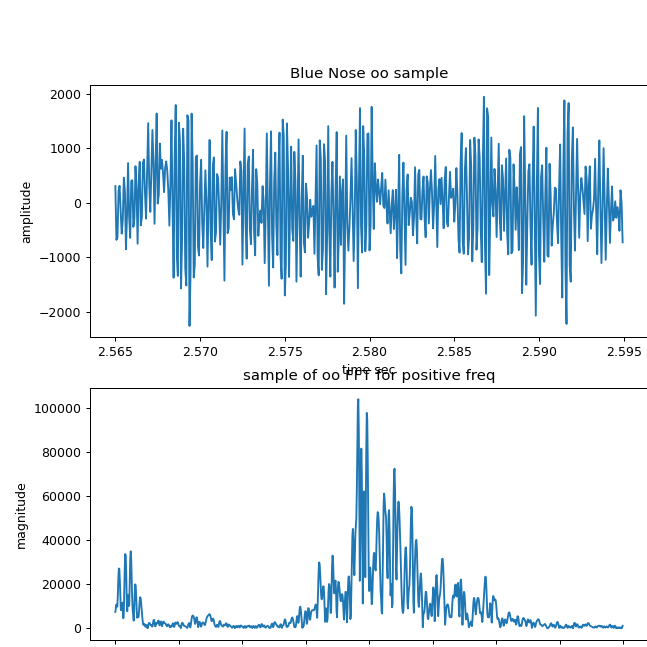

Text(0, 0.5, 'magnitude')

In [25]:
# 3. Repeat the exercise above using the samples corresponding to times [2.565,2.595]. (This corresponds
# to the “s” sound.)

extract = sound[int(2.565*fs):int(2.595*fs)].copy()
t_extract = time[int(2.565*fs):int(2.595*fs)].copy()

nfft = 2048
xhf = np.fft.fft(extract, nfft)
freq = np.arange(0, fs, fs / nfft)

fig = plt.subplots(2, 1, figsize=(8, 8))

plt.subplot(211)
plt.plot(t_extract, extract)
plt.title('Blue Nose oo sample')
plt.xlabel('time sec')
plt.ylabel('amplitude')

plt.subplot(212)
plt.plot(freq[0:nfft//2], np.abs(xhf[0:nfft//2]))
plt.title('sample of oo FFT for positive freq')
plt.xlabel('frequency Hz')
plt.ylabel('magnitude')

### Assignment 4 Discussion

For the FFT, we used a size of 512 because it is a power of 2 that is close to 480, which is the array size for a 30 ms sample with the sampling frequency 16000. The second sample ("s") has more noise than the first sample ("oo") because it is less resonant with more high frequency parts of the sound that are spread out than the first sample. 